# HLMA 408: Premiers pas en *Python/Pandas*

***
> __Auteur__: Joseph Salmon
> <joseph.salmon@umontpellier.fr>

## Introduction et présentation

### Import des packages usuels

In [1]:
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from scipy.stats import norm

### Verifier les versions des packages utilisées

In [2]:
print('The python version is', platform.python_version())
print('numpy {}.'.format(np.__version__))

The python version is 3.7.3
numpy 1.16.2.


### Commande "magique" pour un affichage plus avancé en Jupyter

In [3]:
%matplotlib notebook

### Préparation pour l'affichage graphique et sauvegarder les images
La cellule qui suit est inutile en première lecture

In [4]:
# saving tools for the course:
sns.set_context("paper", font_scale=1)
sns.set_style("ticks")
sns.set_palette("colorblind")

plt.rcParams.update({'figure.max_open_warning': 50})  # avoid warning when too many plots are opened

# colors 
brown = (0.64, 0.16, 0.16)
purple = (148. / 255, 0, 211. / 255)

dirname = "../prebuiltimages/"
imageformat = ".pdf"

## Description des données: grossesses et cigarettes, impact sur la santé du nouveau-né

Description des données:

"This  dataset  is  found  from
http://www.stat.berkeley.edu/users/statlabs/labs.html. 
It accompanies the excellent text Stat Labs:  Mathematical Statistics through Applications
Springer-Verlag (2001) by Deborah Nolan and Terry Speed."

Plus de détails:
https://www.stat.berkeley.edu/users/statlabs/papers/sample.pdf
(notamment sur les biais de collectes des données...)

### Téléchargement et import des données
(inutile en première lecture)

In [5]:
# pip install download

In [6]:
from download import download  # si download n'est pas installé décommenter la ligne du dessus
saving = True
path_target = "./utils.py"
url_shared_files = "http://josephsalmon.eu/enseignement/Montpellier/HLMA408/sharedcode/utils.py"
download(url_shared_files, path_target, replace=False)
from utils import my_saving_display

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


In [7]:
url = "http://josephsalmon.eu/enseignement/datasets/babies23.data"
# url = "http://www.stat.berkeley.edu/users/statlabs/data/babies23.data" # backup url, without header.
path_target = "./babies23.data"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./babies23.data'

### Options de *pandas* pour l'affichage

In [8]:
# Preoprocessing: only run once or big trouble (think about it!)
is_preprocessing_done = 0  # init at 0,if greater don't redo it
pd.options.display.max_rows = 10  # set not to display to many lines in pandas
pd.set_option('precision', 3)  # set to display number at precision 0 in pandas

### Lecture de la base de données et constructions d'un dataframe
Il faut maintenant avoir les données en local soit en les téléchargeant avec ```download``` soit "à la main" ici:
http://josephsalmon.eu/enseignement/datasets/babies23.data

In [9]:
# ?pd.read_csv  # décommenter pour obtenir de l'aide sur la fonctoin read_csv de pandas.

In [10]:
# le fichier peut être télécharger ici:
# http://josephsalmon.eu/enseignement/datasets/babies23.data
# et mis dans le repertoire de votre notebook

df_babies = pd.read_csv("babies23.data", skiprows=38, sep='\s+') # \s+ : for hanlding spaces
df_babies.head(n=10)  # df stands for Data Frame

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
0,15,5,1,1411,284,1,120,1,8,27,...,8,31,5,65,110,1,1,0,0,0
1,20,5,1,1499,282,1,113,2,0,33,...,0,38,5,70,148,1,4,0,0,0
2,58,5,1,1576,279,1,128,1,0,28,...,5,32,1,99,999,1,2,1,1,1
3,61,5,1,1504,999,1,123,2,0,36,...,3,43,4,68,197,1,8,3,5,5
4,72,5,1,1425,282,1,108,1,0,23,...,0,24,5,99,999,1,1,1,1,5
5,100,5,1,1673,286,1,136,4,0,25,...,3,28,2,64,130,1,4,2,2,2
6,102,5,1,1449,244,1,138,4,7,33,...,7,37,4,99,999,1,98,0,0,0
7,129,5,1,1562,245,1,132,2,7,23,...,7,23,4,71,192,1,2,0,0,0
8,142,5,1,1408,289,1,120,3,0,25,...,3,26,1,70,180,0,2,0,0,0
9,148,5,1,1568,299,1,143,3,0,30,...,0,34,5,99,999,1,2,1,1,4


### Statistiques descriptives élémentaires

In [11]:
df_babies.describe()

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
count,1236.000,1236.0,1236.0,1236.000,1236.000,1236.0,1236.000,1236.000,1236.000,1236.000,...,1236.000,1236.000,1236.000,1236.000,1236.000,1236.000,1236.000,1236.000,1236.000,1236.000
mean,6000.836,5.0,1.0,1535.837,286.908,1.0,119.577,1.932,3.206,27.371,...,3.665,30.737,3.189,81.667,505.401,1.038,13.161,0.868,1.748,2.604
std,2257.289,0.0,0.0,106.895,75.157,0.0,18.236,1.933,4.187,6.457,...,6.840,8.522,1.702,14.278,406.686,0.326,28.424,1.163,8.824,8.890
min,15.000,5.0,1.0,1350.000,148.000,1.0,55.000,0.000,0.000,15.000,...,0.000,18.000,0.000,60.000,110.000,0.000,0.000,0.000,0.000,0.000
25%,5286.250,5.0,1.0,1444.000,272.000,1.0,108.750,0.000,0.000,23.000,...,0.000,25.000,2.000,70.000,165.000,1.000,2.000,0.000,0.000,0.000
50%,6729.500,5.0,1.0,1539.500,280.000,1.0,120.000,1.000,3.000,26.000,...,3.000,29.000,4.000,73.000,190.000,1.000,4.000,1.000,1.000,1.000
75%,7583.250,5.0,1.0,1627.000,288.000,1.0,131.000,3.000,7.000,31.000,...,7.000,35.000,5.000,99.000,999.000,1.000,7.000,1.000,1.000,3.000
max,9263.000,5.0,1.0,1714.000,999.000,1.0,176.000,13.000,99.000,99.000,...,99.000,99.000,9.000,99.000,999.000,5.000,98.000,9.000,99.000,98.000


## Pré-traitement et données manquantes

### Données manquantes / NaN (Not A Number)

In [12]:
(df_babies.isnull().any()) # données manquantes?

id           False
pluralty     False
outcome      False
date         False
gestation    False
             ...  
marital      False
inc          False
smoke        False
time         False
number       False
Length: 23, dtype: bool

<IPython.core.display.Javascript object>


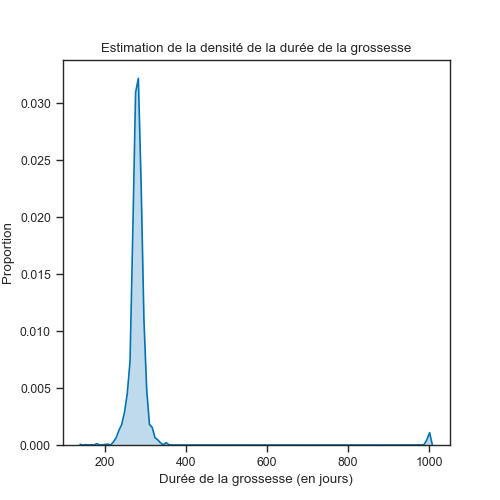

Text(0.5, 1.0, 'Estimation de la densité de la durée de la grossesse')

In [13]:
plt.figure(figsize=(5,5))
ax = sns.kdeplot(df_babies['gestation'], shade=True)
plt.xlabel('Durée de la grossesse (en jours)')
plt.ylabel('Proportion')
ax.legend().set_visible(False)
plt.title("Estimation de la densité de la durée de la grossesse")

### Données aberrantes
Bizarre bizarre des grossesses qui durent 1000 jours, mais que se passe-t-il ici?

In [14]:
percentage_na = np.sum(df_babies['gestation']
                       == 999) / df_babies['gestation'].count() * 100
print("Il y a {0:.2f}% des grossesses de la base de donnée qui durent 999 jours...".format(
    percentage_na))  # {0:.2f} use to display only 2 digits after the sign "." 

Il y a 1.05% des grossesses de la base de donnée qui durent 999 jours...


### Pré-traitement: unités non internationales, donnnées manquantes
Lire l'entête du fichier permet de comprendre les problèmes... les unités, les données manquantes, etc.
Il faut donc toujours lire les descriptifs des données **AVANT** de les analyser.

In [15]:
if is_preprocessing_done < 1:
    print("You have to do the pre-processing only once, to avoid unit issues")

    # Handle missing values (see header of babies23.data for details)

    # Unknown gestation duration
    df_babies['gestation'].replace(999, np.nan, inplace=True)
    # Unknown smoking status of the mother
    df_babies['smoke'].replace(9, np.nan, inplace=True)
    # Mother's height
    df_babies['ht'].replace(99, np.nan, inplace=True)
    # Father's height
    df_babies['dht'].replace(99, np.nan, inplace=True)
    # Father's weight
    df_babies['dwt'].replace(999, np.nan, inplace=True)
    # Mother's weight
    df_babies['wt.1'].replace(999, np.nan, inplace=True)
    # Baby's weight
    df_babies['wt'].replace(999, np.nan, inplace=True)
    # Tabaco consumption
    df_babies['number'].replace(9, np.nan, inplace=True)
    df_babies['number'].replace(98, np.nan, inplace=True)
    df_babies['number'].replace(99, np.nan, inplace=True)

    # Remove all missing values
    df_babies.dropna(inplace=True)

    # US researchers use stupid non international units...
    df_babies['wt'] = df_babies['wt'] * 0.0283495  # onces -> kg
    df_babies['wt.1'] = df_babies['wt.1'] * 0.453592  # pounds -> kg
    df_babies['dwt'] = df_babies['dwt'] * 0.453592  # pounds -> kg
    df_babies['ht'] = df_babies['ht'] * 2.54  # inches -> cm
    df_babies['dht'] = df_babies['dht'] * 2.54  # inches -> cm

    # Tabaco consumption: change irrelevant numbers by relevant numbers

    df_babies['number'].replace(1, 2.5, inplace=True)
    df_babies['number'].replace(3, 12, inplace=True)
    df_babies['number'].replace(4, 17, inplace=True)
    df_babies['number'].replace(5, 24.5, inplace=True)
    df_babies['number'].replace(6, 34.5, inplace=True)
    df_babies['number'].replace(7, 50, inplace=True)
    df_babies['number'].replace(8, 70, inplace=True)
    df_babies['number'].replace(2, 7, inplace=True)

    print("This is done only because {} < 1".format(is_preprocessing_done))
    is_preprocessing_done += 1

You have to do the pre-processing only once, to avoid unit issues
This is done only because 0 < 1


## Visualisation

### Densité et estimation de densité

<IPython.core.display.Javascript object>


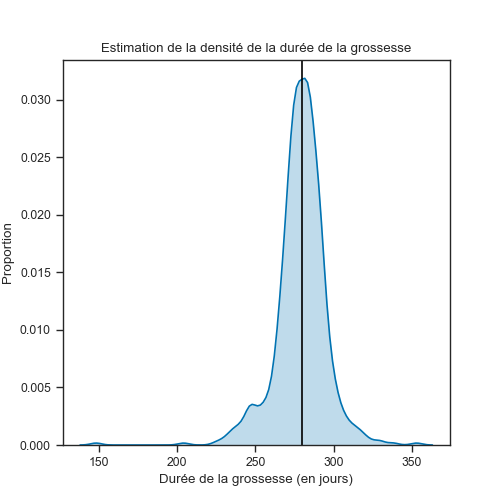

Text(0.5, 1.0, 'Estimation de la densité de la durée de la grossesse')

In [16]:
plt.figure(figsize=(5, 5))
ax = sns.kdeplot(df_babies['gestation'], shade=True)
plt.xlabel('Durée de la grossesse (en jours)')
plt.ylabel('Proportion')
plt.axvline(40 * 7, c='k')  # vertical bar at 40 weeks
ax.legend().set_visible(False)  # remove legend here
plt.title("Estimation de la densité de la durée de la grossesse")

# print("Il y a maintenant {} valeur(s) manquante(s).".format(sum(df_babies["gestation"].isnull())))

In [17]:
np.quantile(df_babies['gestation'],np.linspace(0.05,0.95,num=19)) 

array([250. , 262.4, 267. , 270. , 272. , 274. , 275. , 277. , 278. ,
       280. , 282. , 283. , 284. , 286. , 288. , 290. , 292. , 295. ,
       302. ])

In [18]:
pd.set_option('precision',3)  # display 3 digits now in pandas

In [19]:
df_babies['dwt']  # father pre-pregnancy weight in kg

0       49.895
1       67.132
5       58.967
7       87.090
8       81.647
         ...  
1231    86.182
1232    77.111
1233    81.647
1234    74.843
1235    78.018
Name: dwt, Length: 695, dtype: float64

In [20]:
df_babies['wt.1']  # mother weight in kg

0       45.359
1       61.235
5       42.184
7       63.503
8       56.699
         ...  
1231    45.359
1232    54.431
1233    68.039
1234    49.895
1235    58.513
Name: wt.1, Length: 695, dtype: float64

In [21]:
df_babies['wt'] # babies weight in kg

0       3.402
1       3.203
5       3.856
7       3.742
8       3.402
        ...  
1231    3.203
1232    3.629
1233    3.685
1234    3.544
1235    3.317
Name: wt, Length: 695, dtype: float64

In [22]:
df_babies['wt'].max(), df_babies['wt'].min() # max and min weight at birth

(4.9895119999999995, 1.5592225)

## <font color='red'> EXERCICE : Estimation de la densité (KDE) par genre </font>
Exercice: afficher les poids des parents et visualiser les différences?

<IPython.core.display.Javascript object>


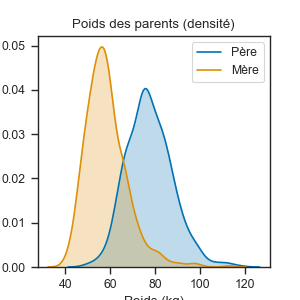

Text(0, 0.5, 'Propotion')

In [23]:
# Réponse:
plt.figure(figsize=(3, 3))
plt.title("Poids des parents (densité)")
sns.kdeplot(df_babies['dwt'], label="Père", shade=True)
sns.kdeplot(df_babies['wt.1'], label="Mère", shade=True)
plt.xlabel("Poids (kg)")
plt.ylabel("Propotion")

### Estimation de la densité par histogramme

<IPython.core.display.Javascript object>


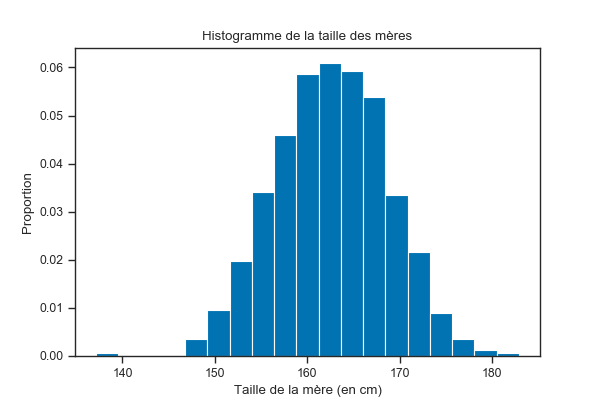

In [24]:
fig_hist_height = plt.figure(figsize=(6,4))
plt.hist(df_babies['ht'], density=True, bins=19)
plt.xlabel('Taille de la mère (en cm)')
plt.ylabel('Proportion')
plt.title("Histogramme de la taille des mères")
my_saving_display(fig_hist_height, dirname, "hist_height_mother", imageformat,saving=saving)

**Remarque**: pour des données continues, et avec un large échantillon, il semble plus raisonnable d'utiliser les méthodes à noyaux (kde) proposées ci-dessous.
Le rendu est plus fidèle à la réalité sous-jacentes.
Pour cela on peut regarder ci-dessous l'information proposée par une méthode à noyaux sur les mêmes données.

### Estimation de la densité par une méthode à noyaux

<IPython.core.display.Javascript object>


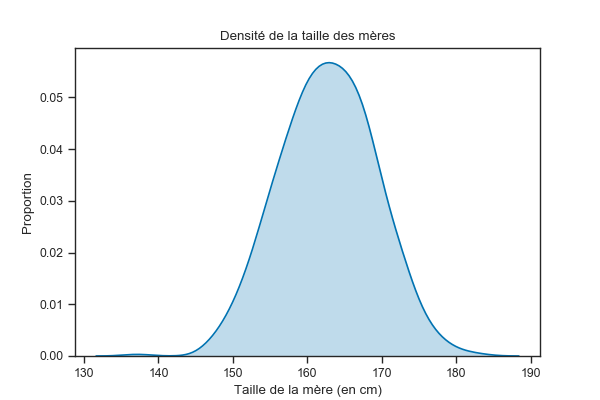

In [25]:
fig_hist_height = plt.figure(figsize=(6,4))
ax = sns.kdeplot(df_babies['ht'], shade=True) # kde = Kernel Density Estimate
plt.xlabel('Taille de la mère (en cm)')
plt.ylabel('Proportion')
plt.title("Densité de la taille des mères")
ax.get_legend().remove()
my_saving_display(fig_hist_height, dirname,
                  "kde_height_mother", imageformat, saving=saving)

### Explication visuelle du fonctionnement des méthodes à noyaux
Voici ci-dessous une explication visuelle du fonctionnement des méthodes à noyaux.
Il est à noter que les histogrammes font partie de la même famille, mais au lieu "d'empiler" des densités continues (gaussiennes ici), on empile des densités constantes par morceaux!

<IPython.core.display.Javascript object>


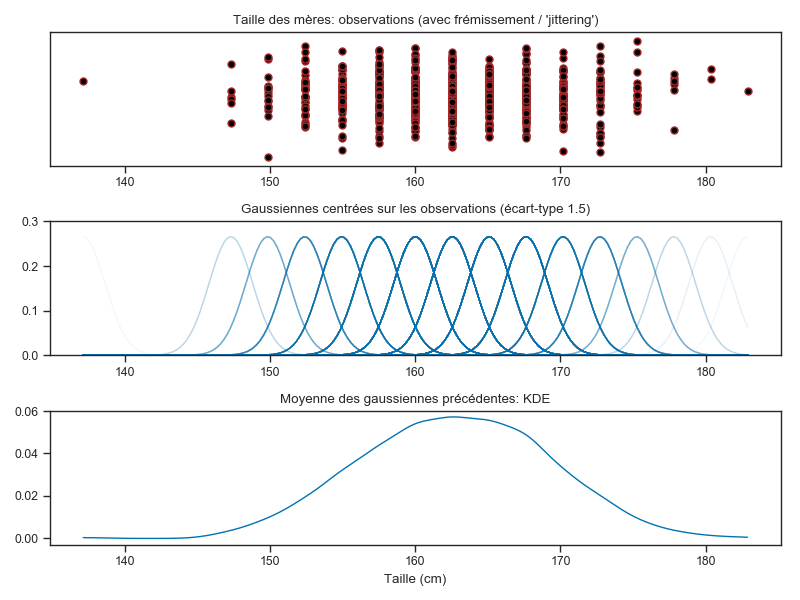

In [26]:
n_samples = df_babies['ht'].count()  # put 10 to visualize better
# n_samples = 100  # put 10 to visualize better

sample = df_babies['ht'].iloc[0:n_samples]
y = np.zeros(n_samples,) + 0.15 * np.random.randn(n_samples,)
bandwidth = 1.5 # KDE parameter / bandwidth
x = np.linspace(sample.min(), sample.max(), num=200)
z = np.zeros(200)

fig, ax = plt.subplots(3, 1, figsize=(8, 6))

# First plot
ax[0].scatter(sample, y, c='black', s=25,
              marker='o', edgecolors=brown, lw='1')
ax[0].set_title("Taille des mères: observations (avec frémissement / 'jittering')")
ax[0].set_yticks([])

# Second plot
for i in range(n_samples):
    current_density = norm.pdf(x, sample.iloc[i], bandwidth)
    z += current_density / n_samples
    ax[1].plot(x, current_density, '-',
               color=sns.color_palette()[0], lw=1, alpha=0.05)
ax[1].set_title(
    "Gaussiennes centrées sur les observations (écart-type {0})".format(bandwidth))
ax[1].set_ylim(0, .3)

# Third plot
ax[2].plot(x, z, '-', color=sns.color_palette()[0], lw=1)
ax[2].set_title("Moyenne des gaussiennes précédentes: KDE")
ax[2].set_xlabel('Taille (cm)')

plt.tight_layout()  # help improve spacing between subplots
my_saving_display(fig, dirname,
                  "kde_for_dummies", imageformat, saving=saving)

### Affichage et coefficient alpha
Dans la partie ci-dessus le coefficient alpha (cf. la figure du milieu ci-dessus) permet d'afficher de manière plus opaque les gaussiennes qui sont plus fréquentes que les autres.

### Synthèse de l'échantillon

In [27]:
mean = np.mean(df_babies['ht'])
sd = np.std(df_babies['ht'])
print("Moyenne={0} (cm) et écart-type={1} (cm)".format(mean, sd))

Moyenne=162.71715107913673 (cm) et écart-type=6.4288819931782255 (cm)


### Autres dentisés unidimensionnelles

In [28]:
# Exercice: afficher sur un même graphique la répartition de la taille des parents, une courbe homme / une courbe femme 

<IPython.core.display.Javascript object>


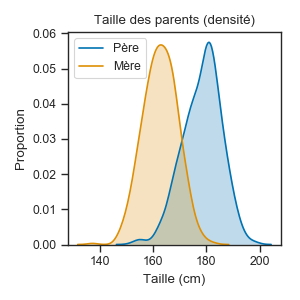

In [29]:
# Réponse:
plt.figure(figsize=(3, 3))
plt.title("Taille des parents (densité)")
sns.kdeplot(df_babies['dht'], label="Père", shade=True)
sns.kdeplot(df_babies['ht'], label="Mère", shade=True)
plt.xlabel("Taille (cm)")
plt.ylabel("Proportion")
plt.tight_layout() # help improve spacing between subplots (possible difficulty reading label/title without)

<IPython.core.display.Javascript object>


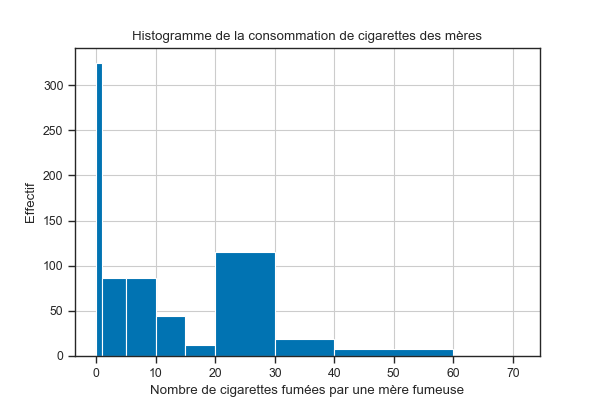

In [30]:
fig_hist_cigs = plt.figure(figsize=(6, 4))

hist_manual = df_babies.loc[df_babies["number"] > -1, 'number']
hist_manual.hist(bins=[0, 1, 5, 10, 15, 20, 30, 40, 60, 71], density=False) # test: True/False
plt.xlabel('Nombre de cigarettes fumées par une mère fumeuse')
plt.ylabel('Effectif')
plt.title("Histogramme de la consommation de cigarettes des mères")
my_saving_display(fig_hist_cigs, dirname,
                  "hist_cigs_mother", imageformat, saving=saving)

In [31]:
# hist_manual
hist_manual.value_counts() / hist_manual.count() * 100

0.0     46.763
24.5    16.547
2.5     12.374
7.0     12.374
12.0     6.331
34.5     2.734
17.0     1.727
50.0     1.151
Name: number, dtype: float64

In [32]:
# check sum = 100%
np.sum(hist_manual.value_counts() / hist_manual.count() * 100)

100.0

<IPython.core.display.Javascript object>


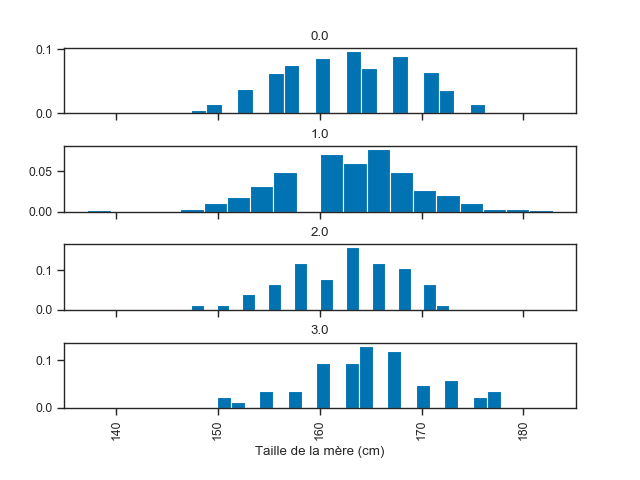

Text(0.5, 0, 'Taille de la mère (cm)')

In [33]:
# histogram of height by type of smoker: 0 never, 1 now, 2 during pregnancy, 3 within 1yr
df_babies.hist(column='ht', by='smoke',density=True, bins=20, grid=False, layout=(4,1), sharex=True)
plt.xlabel('Taille de la mère (cm)')

In [34]:
# help on subplots:
plt.subplots?

<IPython.core.display.Javascript object>


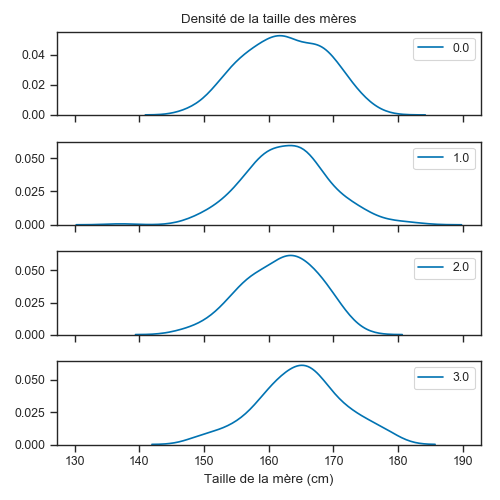

In [35]:
nrow = 4
ncol = 1
fig, axs = plt.subplots(nrow, ncol,figsize=(5,5),sharex=True)
for i, group in enumerate(df_babies.groupby("smoke")):
    if i is 0:
        axs[i].set_title("Densité de la taille des mères")    
    sns.kdeplot(group[1]["ht"],ax=axs[i],label=group[0])
    if i is 3:
        axs[i].set_xlabel("Taille de la mère (cm)")    
plt.tight_layout()

<IPython.core.display.Javascript object>


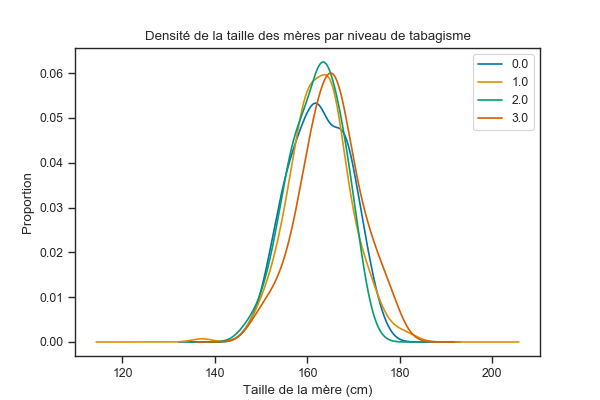

Text(0.5, 1.0, 'Densité de la taille des mères par niveau de tabagisme')

In [36]:
plt.figure(figsize=(6,4))
df_babies.groupby("smoke").ht.plot(kind='kde')
plt.legend()
plt.xlabel('Taille de la mère (cm)')
plt.ylabel('Proportion')
plt.title("Densité de la taille des mères par niveau de tabagisme")

## Densité bi-dimensionnelle
La cellule qui suit est inutile en première lecture

In [37]:
path_target = "./plot_species_kde.py"
url_shared_files = "https://raw.githubusercontent.com/scikit-learn/scikit-learn/master/examples/neighbors/plot_species_kde.py"
download(url_shared_files, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./plot_species_kde.py'

<IPython.core.display.Javascript object>


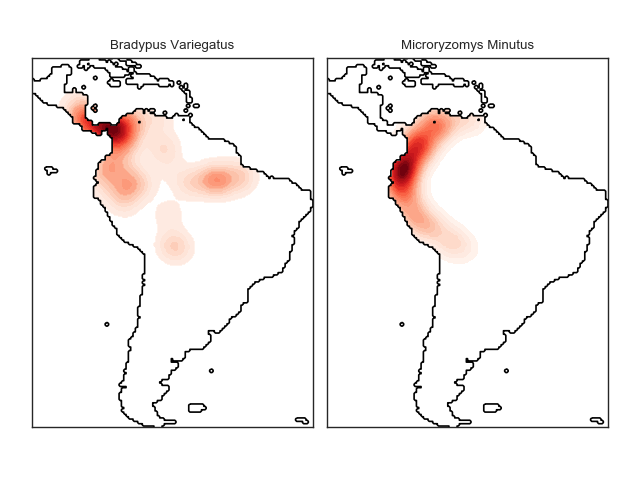

 - computing KDE in spherical coordinates
 - plot coastlines from coverage
 - computing KDE in spherical coordinates
 - plot coastlines from coverage


In [38]:
# le fichier peut être téléchargé ici:
# https://raw.githubusercontent.com/scikit-learn/scikit-learn/master/examples/neighbors/plot_species_kde.py
# et mis dans le repertoire de votre notebook 
exec(open('plot_species_kde.py').read())
my_saving_display(fig, dirname, "KDE2D", imageformat,saving=saving)

# Statistiques descriptives

In [39]:
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

X = df_babies['dwt']  # Father height
nb_samples = X.shape[0]
y = np.ones(nb_samples,) + 0.05 * np.random.randn(nb_samples,)

# Statistique:
meanX = np.mean(X)  # mean
minX = np.min(X)  # min
maxX = np.max(X)  # max
medX = np.median(X)  # median
MADX = np.median(np.abs(X - medX))  # mean absolute deviation
s = np.std(X)  # standard deviation default of numpy is 1/n, see np.std?

alpha_trim = 0.15
tmeanX = stats.trim_mean(X, alpha_trim)  # trimmed mean (level: alpha_trim)

dim1, dim2 = 9, 3
ymax = 1.6

## Estimateur de position (ou de centrage)

### La moyenne (empirique)

<IPython.core.display.Javascript object>


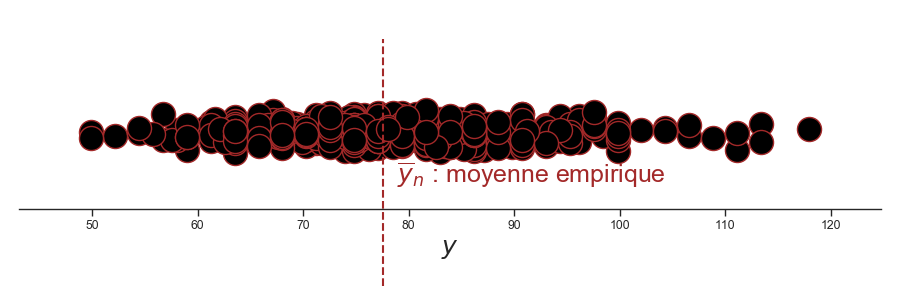

/home/jo/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [40]:
fig1, ax = plt.subplots(figsize=(dim1, dim2))
ax.set_ylim(0, 1.1 * ymax)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')
ax.plot([meanX, meanX], [0, ymax], color=brown, lw=1.5, ls="--")

plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\overline{y}_n$ : moyenne empirique',
             xy=(meanX, 0.4), xycoords='data', xytext=(+10, +30),
             textcoords='offset points', fontsize=18, color=brown)

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "DadWeightMean", imageformat,saving=saving)

### La médiane (empirique)

<IPython.core.display.Javascript object>


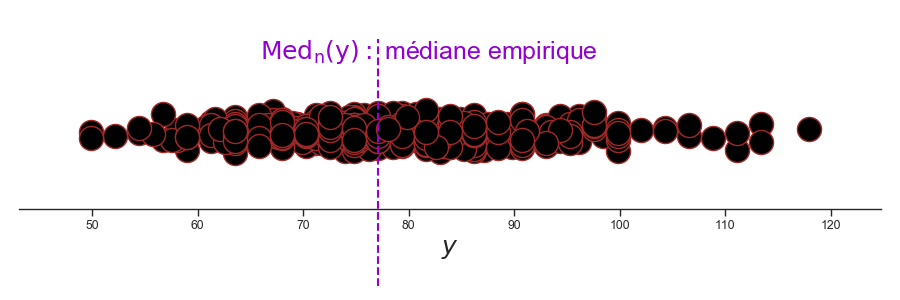

In [41]:
fig2, ax = plt.subplots(figsize=(dim1, dim2))
ax.set_ylim(0, 1.1 *  ymax)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')

ax.plot([medX, medX], [0, ymax], color=purple, lw=1.5, ls="--")
plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\rm{Med}_n(y):$ médiane empirique',
             xy=(medX, 1), xycoords='data', xytext=(-85, +52),
             textcoords='offset points', fontsize=18, color=purple)

plt.tight_layout()
plt.show()

my_saving_display(fig2, dirname, "DadWeightMediane", imageformat,saving=saving)

### La moyenne tronquée (au niveau $\alpha_{trim}$)

<IPython.core.display.Javascript object>


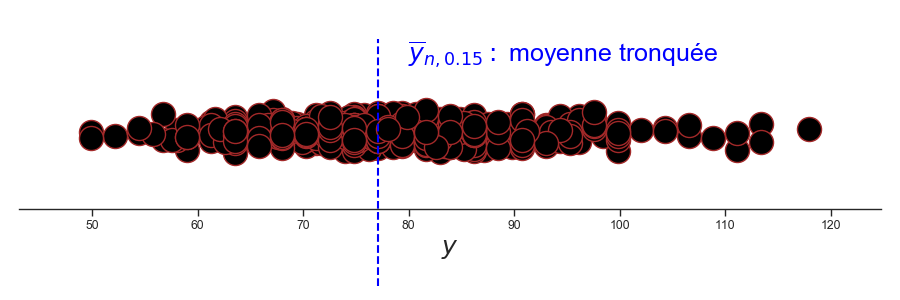

In [42]:
fig1, ax = plt.subplots(figsize=(dim1, dim2))
ax.set_ylim(0, 1.1 * ymax)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')

ax.plot([tmeanX, tmeanX], [0, ymax], c='blue', lw=1.5, ls="--")
plt.xlabel(r'$y$', fontsize=18)
tt = "$\overline{y}_{n,%s} :$ moyenne tronquée" % str(alpha_trim)
plt.annotate(tt, xy=(tmeanX, 1), xycoords='data', xytext=(+22, +50),
             textcoords='offset points', fontsize=18, color='blue')

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "DadWeightTrimmed", imageformat,saving=saving)


### Comparatif des statistiques de centrages (ou de position)

<IPython.core.display.Javascript object>


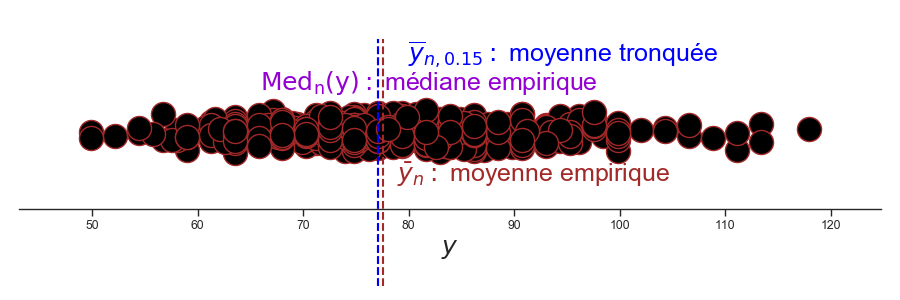

In [43]:
fig1, ax = plt.subplots(figsize=(dim1, dim2))
ax.set_ylim(0, 1.1 * ymax)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')

ax.plot([meanX, meanX], [0, ymax], color=brown, lw=1.5, ls="--")
ax.plot([medX, medX], [0, ymax], color=purple, lw=1.5, ls="--")
ax.plot([tmeanX, tmeanX], [0, ymax], color='blue',
        lw=1.5, ls="--")

plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\rm{Med}_n(y):$ médiane empirique',
             xy=(medX, 1), xycoords='data', xytext=(-85, +30),
             textcoords='offset points', fontsize=18, color=purple)
plt.annotate(r'$\bar{y}_n :$ moyenne empirique', xy=(meanX, 0.4),
             xycoords='data', xytext=(+10, +30), textcoords='offset points',
             fontsize=18, color=brown)
plt.annotate(tt, xy=(tmeanX, 1), xycoords='data', xytext=(+22, +50),
             textcoords='offset points', fontsize=18, color='blue')

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "DadWeightMedianeMean",
                  imageformat, saving=saving)

## Estimateurs de dispersion

### L'écart-type (empirique)

<IPython.core.display.Javascript object>


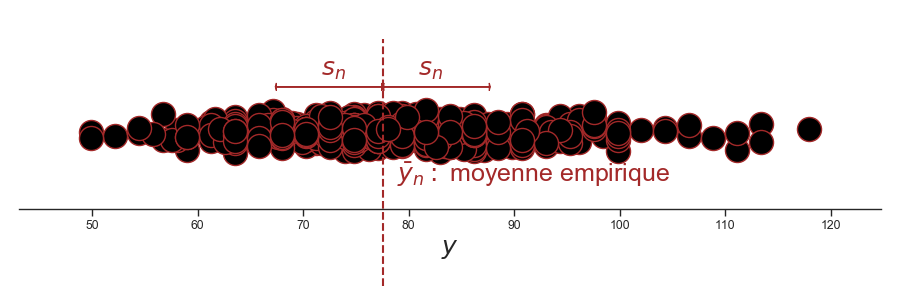

In [44]:
fig1, ax = plt.subplots(figsize=(dim1, dim2))
ax.set_ylim(0, 1.1 * ymax)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')

altitude = 1.29
plt.arrow(meanX, altitude, -s, 0, fc=brown, ec=brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX - s, altitude, s, 0, fc=brown, ec=brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX, altitude, s, 0, fc=brown, ec=brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX + s, altitude, -s, 0, fc=brown, ec=brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)

plt.xlabel(r'$y$', fontsize=18)

plt.annotate(r'$\bar{y}_n :$ moyenne empirique', xy=(meanX, 0.4),
             xycoords='data', xytext=(+10, +30), textcoords='offset points',
             fontsize=18, color=brown)

plt.annotate(r'$s_n$', xy=(meanX + s * (0.2), 1), xycoords='data',
             xytext=(+10, +40), textcoords='offset points', fontsize=18,
             color=brown)
plt.annotate(r'$s_n$', xy=(meanX - s * (0.7), 1), xycoords='data',
             xytext=(+10, +40), textcoords='offset points', fontsize=18,
             color=brown)

ax.plot([meanX, meanX], [0, ymax], color=brown, lw=1.5, ls="--")

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "DadWeightSD", imageformat, saving=saving)

### La médiane des déviations absolues
(en : median of absolute deviation (MAD))

<IPython.core.display.Javascript object>


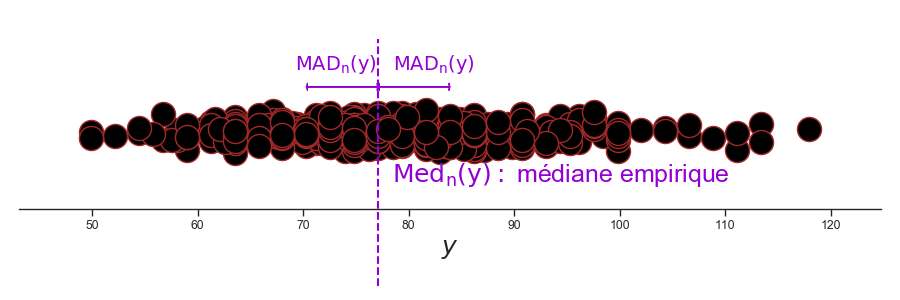

In [45]:
fig1, ax = plt.subplots(figsize=(dim1, dim2))
ax.set_ylim(0, 1.1 * ymax)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')

altitude = 1.29

plt.arrow(medX, altitude, -MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX - MADX, altitude, MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX, altitude, MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX + MADX, altitude, -MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)

plt.xlabel(r'$y$', fontsize=18)

plt.annotate(r'$\rm{Med}_n(y):$ médiane empirique',
             xy=(medX, 0.4), xycoords='data', xytext=(+10, +30),
             textcoords='offset points', fontsize=18, color=purple)
plt.annotate(r'$\rm{MAD}_n(y)$', xy=(medX + MADX * (0.01), 1),
             xycoords='data', xytext=(+10, +44), textcoords='offset points',
             fontsize=14, color=purple)
plt.annotate(r'$\rm{MAD}_n(y)$', xy=(medX - MADX * (1.35), 1),
             xycoords='data', xytext=(+10, +44), textcoords='offset points',
             fontsize=14, color=purple)
ax.plot([medX, medX], [0, ymax], color=purple, lw=1.5, ls="--")

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "DadWeightMAD", imageformat,saving=saving)

## Fonction de répartition (empirique)

<IPython.core.display.Javascript object>


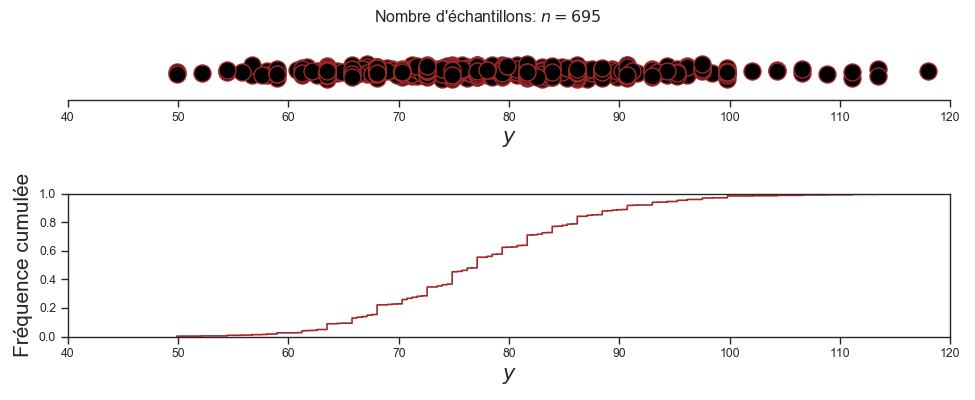

In [46]:
yrange_lim_down = (0., 1.)
yrange_lim_up = (-0.5, 2)
yrange_lim = (-0.1, 0.5)
xrange_lim = (40, 120)

sorted_data = np.sort(X)

dim1, dim2 = (13, 8)
fontsize = 15

fig1 = plt.figure(figsize=(dim1 * 1.5/2, dim2/2))

# plt.subplots_adjust(hspace=0.3)
ax = fig1.add_subplot(211)
ax.set_ylim(yrange_lim_up)
ax.set_xlim(xrange_lim)
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=150, marker='o', edgecolors=brown, lw='1')

plt.xlabel(r'$y$', fontsize=fontsize)
plt.suptitle(r"Nombre d'échantillons: " + "$n={0}$".format(nb_samples),
             multialignment='center')

ax2 = fig1.add_subplot(212)
ax2.set_xlim(xrange_lim)
ax2.set_ylim(yrange_lim_down)
plt.step(sorted_data, np.arange(sorted_data.size, dtype='float') / nb_samples,
         color=brown)
plt.ylabel(r'Fréquence cumulée', fontsize=fontsize)
plt.xlabel(r'$y$', fontsize=fontsize)
plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "DadWeightcdf", imageformat, saving=saving)

### Exercice: Quelle est la taille des sauts?

## Quantiles (empiriques)

<IPython.core.display.Javascript object>


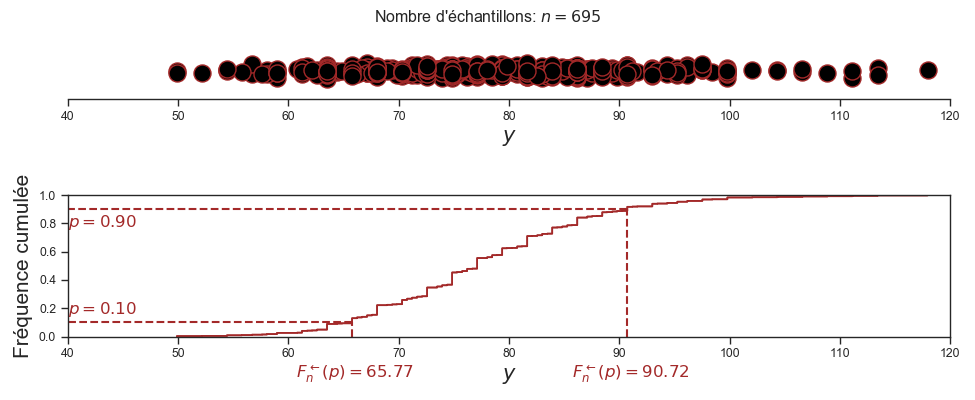

In [47]:
fig2 = plt.figure(figsize=(dim1 * 1.5/2, dim2/2))

plt.subplots_adjust(hspace=0.3)
ax = fig2.add_subplot(211)
ax.set_ylim(yrange_lim_up)
ax.set_xlim(xrange_lim)
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=150, marker='o', edgecolors=brown, lw='1')
plt.xlabel(r'$y$', fontsize=fontsize)
plt.suptitle(r"Nombre d'échantillons: " + "$n={0}$".format(nb_samples),
             multialignment='center')

ax2 = fig2.add_subplot(212)
ax2.set_xlim(xrange_lim)
ax2.set_ylim(yrange_lim_down)
plt.step(sorted_data, np.arange(sorted_data.size, dtype='float') / nb_samples,
         color=brown)

plt.suptitle(r"Nombre d'échantillons: " + "$n={0}$".format(nb_samples),
             multialignment='center')


###############################################################################
# Quantile function: First value to display

p = 0.1
q = np.percentile(X, p * 100)

ax2.plot([q, xrange_lim[0]], [p, p], color=brown, lw=1.5, ls="--")
ax2.plot([q, q], [0, p], color=brown, lw=1.5, ls="--")
ax2.annotate(r'$p=%.2f$' % p, xy=(xrange_lim[0], p), xycoords='data',
             xytext=(0, 6), textcoords='offset points',
             fontsize=fontsize - 3, color=brown)

ax2.annotate(r'$F_n^\leftarrow(p)=%.2f$' % q, xy=(q, 0), xycoords='data',
             xytext=(-40, -30), textcoords='offset points',
             fontsize=fontsize - 3, color=brown)
###############################################################################
# Quantile function: Second value to display

p = 0.90
q = np.percentile(X, p * 100)

ax2.plot([q, xrange_lim[0]], [p, p], color=brown, lw=1.5, ls="--")
ax2.plot([q, q], [0, p], color=brown, lw=1.5, ls="--")
bbox = dict(boxstyle="round", fc="0.8")

ax2.annotate(r'$p=%.2f$' % p, xy=(xrange_lim[0], p), xycoords='data',
             xytext=(0, -13), textcoords='offset points',
             fontsize=fontsize - 3, color=brown)
ax2.annotate(r'$F_n^\leftarrow(p)=%.2f$' % q, xy=(q, 0), xycoords='data',
             xytext=(-40, -30), textcoords='offset points',
             fontsize=fontsize - 3, color=brown)

plt.step(sorted_data, np.arange(sorted_data.size, dtype='float') / nb_samples,
         color=brown)
plt.ylabel(r'Fréquence cumulée', fontsize=fontsize)
plt.xlabel(r'$y$', fontsize=fontsize)

plt.tight_layout()
plt.show()
my_saving_display(fig2, dirname, "DadWeightQuantiles",
                  imageformat, saving=saving)

## Visualisation (niveau 2)

### Boxplots / Boîte à moustache
Visualiser la médiane, les quantiles 1/4 et 3/4, 1.5 inter-quartiles et outliers?
voir e.g. : http://www.itse.be/statistique2010/co/233_Cours_boxplot.html

<IPython.core.display.Javascript object>


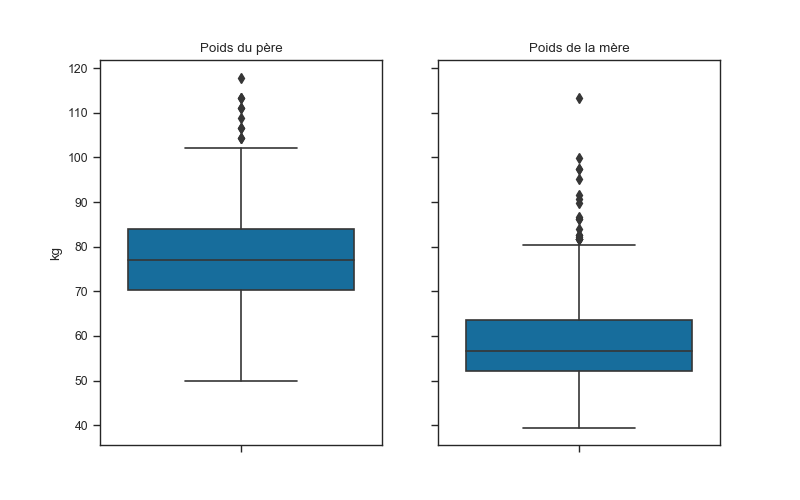

In [48]:
nrow, ncol = (1,2)
fig, axs = plt.subplots(nrow, ncol,figsize=(8, 5),sharey=True)

sns.boxplot(x='dwt',ax=axs[0], data=df_babies, orient='vertical')
axs[0].set_title("Poids du père")
axs[0].set_ylabel("kg")

sns.boxplot(x='wt.1',ax=axs[1], data=df_babies, orient='vertical')
axs[1].set_title("Poids de la mère")
axs[1].set_ylabel("")

my_saving_display(fig, dirname, "DadWeightBoxplot", imageformat,saving=saving)

### Violons

<IPython.core.display.Javascript object>


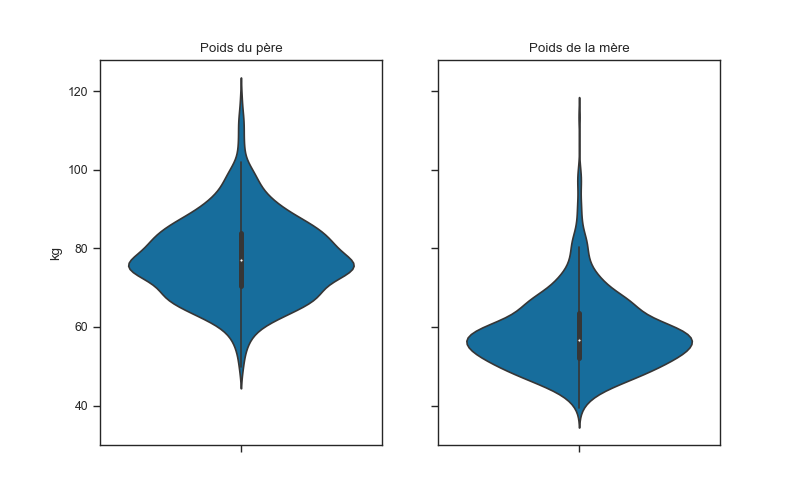

In [49]:
nrow, ncol = (1,2)
fig, axs = plt.subplots(nrow, ncol,figsize=(8, 5),sharey=True)

sns.violinplot(x='dwt', ax=axs[0], data=df_babies, orient='vertical')
axs[0].set_title("Poids du père")
axs[0].set_ylabel("kg")
# axs[0].yaxis.tick_right()

sns.violinplot(x='wt.1',ax=axs[1], data=df_babies, orient='vertical')
axs[1].set_title("Poids de la mère")
axs[1].set_ylabel("")

my_saving_display(fig, dirname, "DadWeightViolin", imageformat,saving=saving)

# Nouvelle base de données : expérience sur les poussins

Des chercheurs se posent la question de savoir si parmi trois traitements possible, il en existe un meilleur que les autres pour améliorer la prise de poids des poussins.
Ils ont consigné l'impact de trois traitements sur la croissance de 45 poussins pour répondre à cette question.
Les 45 oeufs sont répartis aléatoirement entre les trois types de traitement (15/15/15).
Au bout d'un nombre de jours fixé à l'avance, on mesure la croissance (poids) du poussin et on note alors son sexe.

In [50]:
# à passer en première lecture si le package donwload n'est pas installé
url = "http://josephsalmon.eu/enseignement/datasets/poussin.txt"
path_target = "./poussins.txt"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./poussins.txt'

In [51]:
# le fichier peut être télécharger ici:
# http://josephsalmon.eu/enseignement/datasets/poussin.txt
# et mis dans le repertoire de votre notebook
df_chicken = pd.read_csv("poussins.txt", sep='\s+') # \s+ : for handling spaces
df_chicken.head(n=5)  # df stands for Data Frame

,Trait,Sexe,Rdt
0,1,1,26
1,1,1,30
2,1,1,26
3,1,1,33
4,1,1,27


In [52]:
df_chicken.columns=["Traitement", "Sexe", "Poids (dg)"]
df_chicken['Sexe'].replace(1, "Mâle", inplace=True)
df_chicken['Sexe'].replace(2, "Femelle", inplace=True)
df_chicken.head()

,Traitement,Sexe,Poids (dg)
0,1,Mâle,26
1,1,Mâle,30
2,1,Mâle,26
3,1,Mâle,33
4,1,Mâle,27


<IPython.core.display.Javascript object>


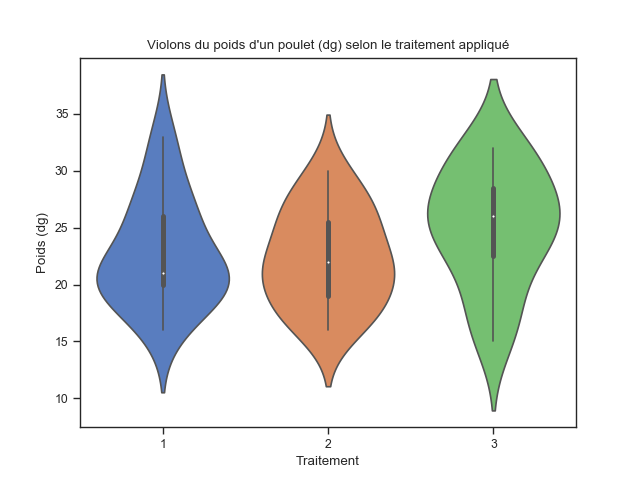

In [53]:
fig_violons = plt.figure()
sns.violinplot(x="Traitement", y="Poids (dg)",
               data=df_chicken, palette="muted", scale="count", inner='box')
plt.title("Violons du poids d'un poulet (dg) selon le traitement appliqué")
my_saving_display(fig_violons, dirname, "Violons_poussin",
                  imageformat, saving=saving)

**Conclusion** (partielle): À première vue, le traitement 3 semble celui conduisant à une plus grosse croissance des poussins...

## Violons avancés

<IPython.core.display.Javascript object>


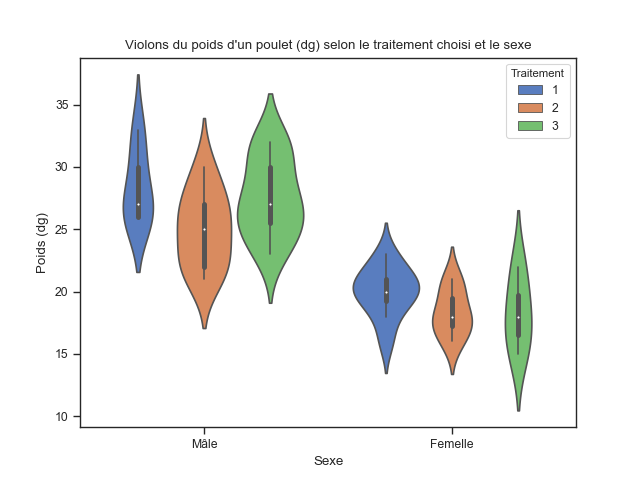

In [54]:
fig_violons_sexe = plt.figure()
sns.violinplot(x="Sexe", y="Poids (dg)", hue="Traitement",
               data=df_chicken, palette="muted", scale="count")
plt.title("Violons du poids d'un poulet (dg) selon le traitement choisi et le sexe")
my_saving_display(fig_violons_sexe, dirname, "Violons_poussin_sexe",
                  imageformat, saving=saving)

## Groupement (en: Groupby)

In [55]:
df_chicken.groupby(['Sexe','Traitement']).count()

Poids (dg)
Sexe    Traitement            
Femelle 1                   10
        2                    6
        3                    4
Mâle    1                    5
        2                    9
        3                   11

<IPython.core.display.Javascript object>


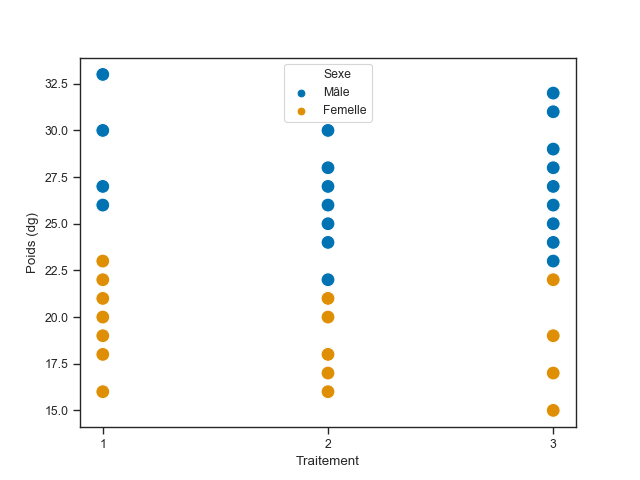

In [56]:
fig1 = plt.figure()
sns.scatterplot(x="Traitement", y="Poids (dg)", hue="Sexe", data=df_chicken, s=100)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([1,2,3])
plt.legend()
my_saving_display(fig1, dirname, "distribution_poussin", imageformat, saving=saving)

## Classes déséquilibrées et conclusions hâtives 
Dans l'expérience ci-dessus on compte les poussins par type de traitement et par sexe.
Ainsi, il y avait 10 femelles qui ont reçu le traitement 1 alors que 5 mâles seulement ont reçu ce traitement 1.
Le sentiment visuel que les premiers violons indiquant un avantage du traitement 3 venait simplement du fait que plus de mâles (dont le poids/rendement est plus gros) avaient reçu le traitement 3.
Il faut donc se méfier de comment les classes sont (ou non) équilibrées... 

## Lois gaussiennes: fonctions de répartition et densités

<IPython.core.display.Javascript object>


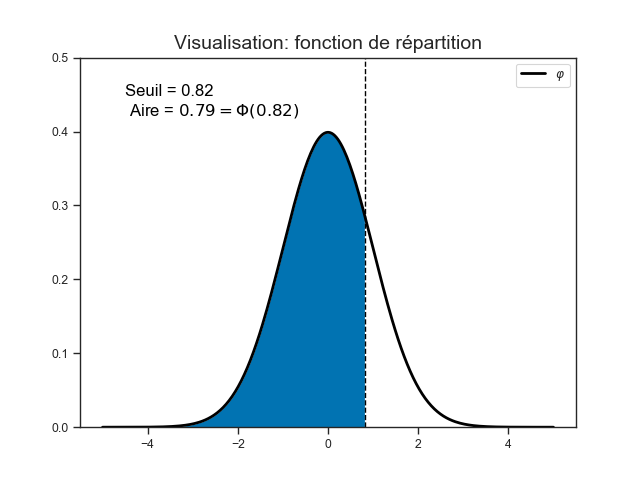

In [57]:
x = np.linspace(-5, 5, 300)
threshold = 168

stat = (threshold - mean) / sd
fig, ax1 = plt.subplots(1, 1)
ax1.plot(x, norm.pdf(x, 0, 1), 'k-', lw=2, label=r"$\varphi$")
ax1.set_ylim(0, 0.5)
ax1.fill_between(x, 0, norm.pdf(x, 0, 1), where=x <= stat)
plt.axvline(x=stat, c='k', ls="--", lw=1)
plt.title("Visualisation: fonction de répartition", fontsize=14)
plt.annotate('Seuil = {0:.2f}\n Aire = ${1:.2f}= \Phi({0:.2f})$'.format(stat, norm.cdf(stat, 0, 1)),
             xy=(-4.5, 0.42), xycoords='data', xytext=(+0, 0.2),
             textcoords='offset points', fontsize=12, color='k')
plt.legend()
my_saving_display(fig, dirname, "VisGaussianCDF", imageformat, saving=saving)

## Corrélations

In [58]:
# dht = dad height
# dwt = dad weight
df_babies[["dwt", "dht"]].corr()

,dwt,dht
dwt,1.000,0.538
dht,0.538,1.000


In [59]:
df_babies[["wt", "ht"]].corr()

,wt,ht
wt,1.000,0.219
ht,0.219,1.000


<IPython.core.display.Javascript object>


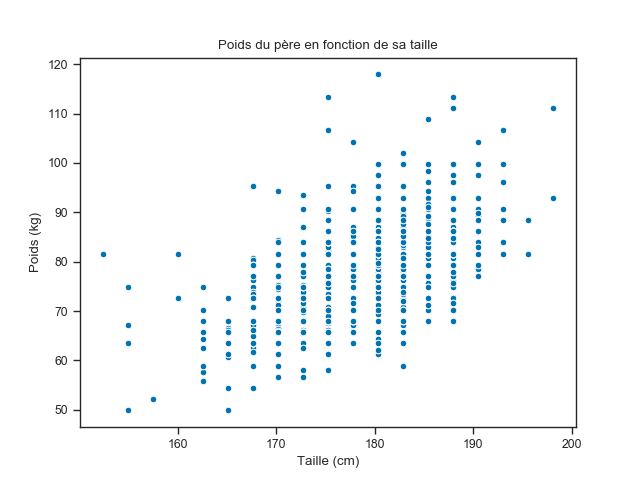

In [60]:
fig_scatter = plt.figure()
ax = sns.scatterplot(x=df_babies["dht"], y=df_babies["dwt"])
ax.set_title('Poids du père en fonction de sa taille')
ax.set_ylabel('Poids (kg)')
ax.set_xlabel('Taille (cm)')
plt.show()

<IPython.core.display.Javascript object>


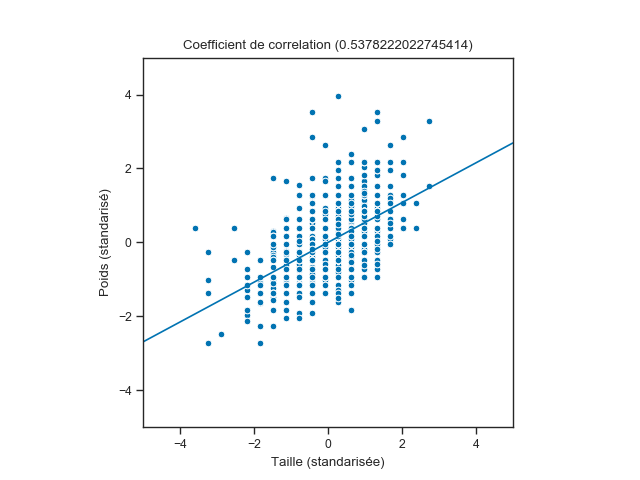

In [61]:
fig = plt.figure()
# Standardization
ax = sns.scatterplot(x=(df_babies["dht"] - df_babies["dht"].mean()) / df_babies["dht"].std(),
                     y=(df_babies["dwt"] - df_babies["dwt"].mean()) / df_babies["dwt"].std())
ax.set_title('Poids du père en fonction de sa taille')
ax.set_ylabel('Poids (standarisé)')
ax.set_xlabel('Taille (standarisée)')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
ax.set_aspect('equal')

x = np.linspace(-5, 5, num=100)
plt.title("Coefficient de correlation ({})".format(
    np.corrcoef(df_babies["dwt"], df_babies["dht"])[0, 1]))
my_saving_display(fig, dirname, "corre_wt_ht_dad", imageformat, saving=saving)

plt.plot(x, np.corrcoef(df_babies["dwt"], df_babies["dht"])[0, 1] * x) # Least Squares line
my_saving_display(fig, dirname, "corre_wt_ht_dad_w_line",
                  imageformat, saving=saving)

In [62]:
np.corrcoef(df_babies["dwt"], df_babies["dht"])[0, 1]

0.5378222022745414

## Plus de conseils en *Pandas* (en anglais): 
https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428